<a href="https://colab.research.google.com/github/BabiiIn/RosInTech/blob/main/%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подготовка массива данных для обучения нейросети, в котором содержится информация о пути к файлу, его имени и координаты ограничивающей рамки (bounding box)

 # Импорт библиотек

In [ ]:
import pandas as pd
import os
import numpy as np

from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

# Заружаем текстовые файлы

In [ ]:
# Загружаем датасет с текстовыми данными text.zip (в sample_data) с папой Texts

In [ ]:
# Распаковываем датасет
!unzip -q text.zip -d data

source_dir_text = 'data/Texts/'

In [ ]:
# Функция для получения списка файлов в папке с путями к ним
def get_file_paths(train_folder_with_tamplate):

    '''
    Args:
        train_folder_with_tamplate - адрес папки
    Return:
        список файлов с путями
        '''

    return glob(train_folder_with_tamplate, recursive=True)

In [ ]:
# Получаем список путей к текстовым файлам с их именами
file_text_list = get_file_paths(source_dir_text+ '/*.txt')
print(len(file_text_list))

5


In [ ]:
file_text_list

['data/Texts/dataset (204).txt',
 'data/Texts/dataset (206).txt',
 'data/Texts/dataset (202).txt',
 'data/Texts/dataset (203).txt',
 'data/Texts/dataset (205).txt']

# Формируем размеченные данные в виде numpy массива для обучения на них нейросети

Данные должны представлять из себя массив, в котором содержится информация о пути к файлу, его имени и координаты ограничивающей рамки (bounding box)

In [ ]:
All_data = []

for file in file_text_list:
  # print(file)
  # фомируем название jpg файла с соответствующей картинкой
  df = pd.read_csv(file, header=None, sep=' ')
  split_text_2 = file.split(sep='/', maxsplit=1)
  f1 = split_text_2[1]
  split_text_3 = f1.split(sep='.', maxsplit=1)
  f2 = split_text_3[0]+'.jpg'
  # print(f2)

  # Добавляем имя файла с картинкой в DataFrame
  df[5] = f2

  # Меняем порядок колонок
  df=df[df.columns[[5,1,2,3,4,0]]]

  # построения списка из данных каждой строки
  # Create an empty list
  Row_list =[]

  # Iterate over each row
  for index, rows in df.iterrows():
    # Create list for the current row
    my_list = rows[5] + " " + str(rows[1]) + ',' + str(rows[2]) + ',' + str(rows[3]) + "," + str(rows[4])  + "," + str(rows[0])

    # append the list to the final list
    Row_list.append(my_list)  # добавляем каждую строку датафрейма в список
  All_data.append(Row_list)
# Print the list
#print(Row_list)
print(All_data)

df.head()

[['Texts/dataset (204).jpg 0.901626,0.871745,0.127607,0.177478,0', 'Texts/dataset (204).jpg 0.706855,0.872749,0.124922,0.179487,0', 'Texts/dataset (204).jpg 0.500674,0.873761,0.112832,0.18151,0', 'Texts/dataset (204).jpg 0.303218,0.880814,0.120889,0.175469,0', 'Texts/dataset (204).jpg 0.105767,0.879809,0.12626,0.181525,0', 'Texts/dataset (204).jpg 0.808271,0.709391,0.137012,0.199663,0', 'Texts/dataset (204).jpg 0.602759,0.710396,0.120889,0.185543,0', 'Texts/dataset (204).jpg 0.395229,0.719472,0.11417,0.183519,0', 'Texts/dataset (204).jpg 0.201802,0.716452,0.108799,0.185543,0', 'Texts/dataset (204).jpg 0.900283,0.443167,0.116855,0.203695,0', 'Texts/dataset (204).jpg 0.706187,0.46838,0.131631,0.217815,0', 'Texts/dataset (204).jpg 0.497314,0.460308,0.124922,0.205718,0', 'Texts/dataset (204).jpg 0.304561,0.456276,0.134316,0.221848,0', 'Texts/dataset (204).jpg 0.10106,0.453248,0.132979,0.191598,0', 'Texts/dataset (204).jpg 0.802227,0.275777,0.122227,0.183519,0', 'Texts/dataset (204).jpg 0.5

,5,1,2,3,4,0
0,Texts/dataset (205).jpg,0.449897,0.812608,0.050537,0.073922,0
1,Texts/dataset (205).jpg,0.507603,0.814061,0.049854,0.076829,0
2,Texts/dataset (205).jpg,0.565649,0.809687,0.051221,0.075869,0
3,Texts/dataset (205).jpg,0.624038,0.810174,0.051904,0.071001,0
4,Texts/dataset (205).jpg,0.681748,0.812121,0.052578,0.071001,0


In [ ]:
# Получаем имя файла с картинкой
#p = os.path.abspath('dataset (202).txt')
#print(p)
#f = os.path.splitext(p)[0]+'.jpg'
#print(f)

/content/dataset (202).txt
/content/dataset (202).jpg


In [ ]:
# Переводим в список
All_data_all = [j for i in All_data for j in i]

In [ ]:
len(All_data_all)

2018

In [ ]:
All_data_all[:10]

['Texts/dataset (204).jpg 0.901626,0.871745,0.127607,0.177478,0',
 'Texts/dataset (204).jpg 0.706855,0.872749,0.124922,0.179487,0',
 'Texts/dataset (204).jpg 0.500674,0.873761,0.112832,0.18151,0',
 'Texts/dataset (204).jpg 0.303218,0.880814,0.120889,0.175469,0',
 'Texts/dataset (204).jpg 0.105767,0.879809,0.12626,0.181525,0',
 'Texts/dataset (204).jpg 0.808271,0.709391,0.137012,0.199663,0',
 'Texts/dataset (204).jpg 0.602759,0.710396,0.120889,0.185543,0',
 'Texts/dataset (204).jpg 0.395229,0.719472,0.11417,0.183519,0',
 'Texts/dataset (204).jpg 0.201802,0.716452,0.108799,0.185543,0',
 'Texts/dataset (204).jpg 0.900283,0.443167,0.116855,0.203695,0']

In [ ]:
# Переводим в array
myarray = np.asarray(All_data_all)

In [ ]:
myarray

array(['Texts/dataset (204).jpg 0.901626,0.871745,0.127607,0.177478,0',
       'Texts/dataset (204).jpg 0.706855,0.872749,0.124922,0.179487,0',
       'Texts/dataset (204).jpg 0.500674,0.873761,0.112832,0.18151,0',
       ...,
       'Texts/dataset (205).jpg 0.732104,0.249249,0.047197,0.067232,0',
       'Texts/dataset (205).jpg 0.763086,0.316474,0.048184,0.067218,0',
       'Texts/dataset (205).jpg 0.676055,0.248547,0.047207,0.068637,0'],
      dtype='<U61')

In [ ]:
# Сохраняем для дальнейшего использования
np.save('fnumpy.npy', myarray)

# Загрузка набора данных


In [ ]:
!rm -rf /content/data/Texts

In [ ]:
# Загружаем датасет с картинками heat.zip (в sample_data)

In [ ]:
# Распаковываем датасет
!unzip -q heat.zip -d data

source_dir = 'data/Texts/'

replace data/Texts/dataset (202).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Получаем список фотографий с путями

In [ ]:
# Получаем список путей ко всем файлам с их именами
file_list = get_file_paths(source_dir+ '/*.jpg')

print(len(file_list))

5


In [ ]:
file_list

['data/Texts/dataset (203).jpg',
 'data/Texts/dataset (202).jpg',
 'data/Texts/dataset (204).jpg',
 'data/Texts/dataset (205).jpg',
 'data/Texts/dataset (206).jpg']

Смотрим фотографии из базы

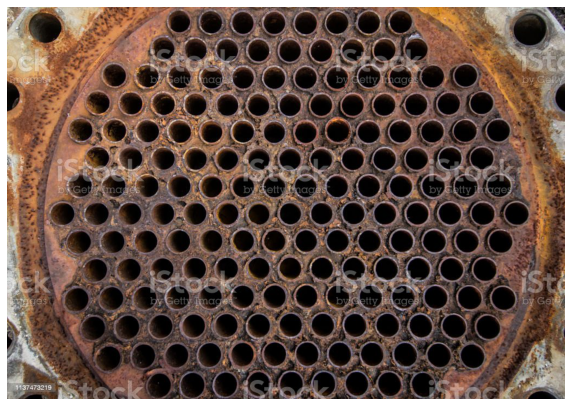

In [ ]:
# загружаем изображение
data = plt.imread(file_list[3])
plt.figure(1, figsize=(10,10))

# выводим изображение
plt.axis('off')
plt.imshow(data)